# WEEK-2 Graded Assignment: Linear Regression

## Introduction

In this exercise, you will implement linear regression and get to see it work on data. Before starting on this programming exercise, we strongly recommend watching the video lectures and work out ungraded assisgnment ,completing the review questions for the associated topics.

All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook.

Before we begin with the exercises, we need to import all libraries required for this programming exercise. Throughout the course, we will be using [`numpy`](http://www.numpy.org/) for all arrays and matrix operations, and [`matplotlib`](https://matplotlib.org/) for plotting.

In [25]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# tells matplotlib to embed plots within the notebook
%matplotlib inline

import copy, math

Iris species of a flower is one of the most popular datasets for machine learning. This dataset is primarily for classification, but here we will use same dataset with some changes so that we can use it for Linear Regression. Let's load the dataset first.

In [26]:
import pandas as pd
from sklearn import datasets
iris = datasets.load_iris()

It includes three iris species named as 'setosa' , 'versicolor', 'virginica' with  some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id,
Sepal Length Cm,
Sepal Width Cm,,
Petal Length Cm,
Petal Width Cm,
Species. Let's see some of the first rows of the datasets after loading it from sklearn.

In [27]:
iris_data =pd.DataFrame(iris.data, columns=iris.feature_names)
iris_data["target"]=iris.target
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Checking if any missing values & Dtype of the dataset 

In [28]:
# iris_data.info()
iris_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

#### We can now *`rename column name`* to make it more standard for ease of coding and readability.

In [29]:
iris_data.rename(columns={'sepal length (cm)':'sepal_length',
                          'sepal width (cm)':'sepal_width',
                          'petal length (cm)':'petal_length',
                          'petal width (cm)':'petal_width'},inplace=True)

In [30]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


#### Add a new column named "*`species`*" having value {if `target == 0` : 'setosa' , if `target ==1` : 'versicolor', if `target == 2` : 'virginica' }

In [31]:
mapping = {0:'setosa',1:'versicolor',2:'virginica'}
iris_data['species'] = iris_data['target'].map(mapping)

In [32]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


#### We will now select "`versicolor`" to `predict its "petal_width" using "petal_length " as one of the parameter`.

So your next task is to make a new DataFrame named "data" having only rows whose species values are 'versicolor'.


In [33]:
data=pd.DataFrame()
data=iris_data[iris_data['species'] == 'versicolor']

data.head()

,sepal_length,sepal_width,petal_length,petal_width,target,species
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


#### Now we are `droping` all the columns except *`petal_length and petal_width`*

In [34]:
data.drop(columns=['target','species','sepal_length','sepal_width'],inplace=True)
data.head()

C:\Users\nikhi\AppData\Local\Temp\ipykernel_4512\220937503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['target','species','sepal_length','sepal_width'],inplace=True)


,petal_length,petal_width
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5


Now write code to print the *`shape`* of DataFrame named as data.

In [35]:
data.shape

(50, 2)

#### Now  plot the Dataframe named data having `x axis -'petal_length'`, `y axis- 'petal_width'` and `kind='scatter'`

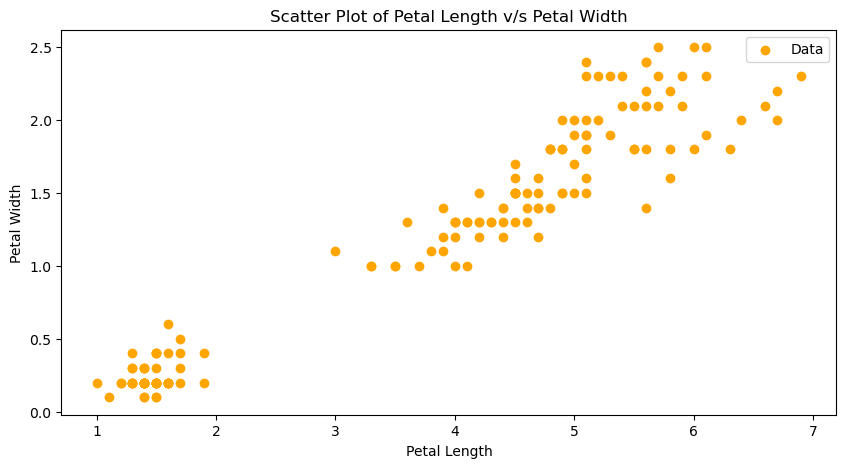

In [36]:
plt.figure(figsize=(10,5))
plt.scatter(iris_data['petal_length'], iris_data['petal_width'], color='orange', label='Data')
plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot of Petal Length v/s Petal Width')

plt.show()

## Now let's start with *`Linear Regression`*

#### We will now split the dataset into training and test datasets into (X_train,Y_train) and (X_test,Y_test)

In [37]:
from sklearn.model_selection import train_test_split

X=data['petal_length'].values.reshape(-1,1)
Y=data['petal_width'].values.reshape(-1,1)

X_train ,X_test ,Y_train ,Y_test = train_test_split(X,Y,test_size=0.33 , random_state=1)

#### Now let's plot the training  datasets of  *kind=scatter* with `x axis - X_train` and `y axis - Y_train`.

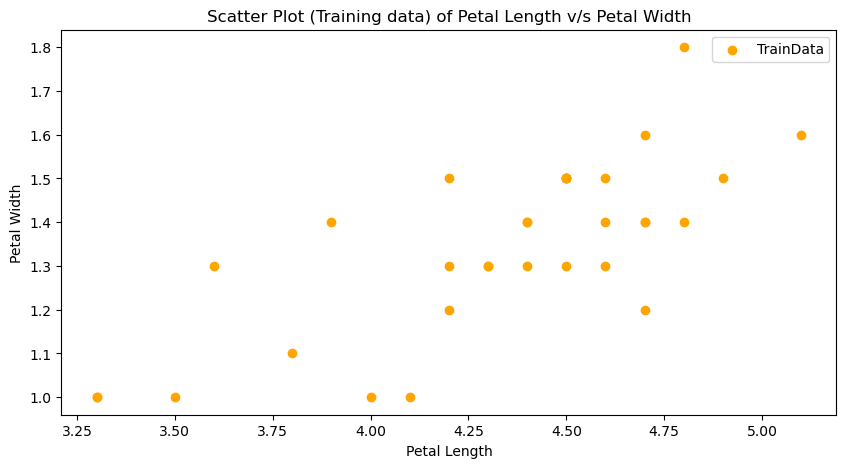

In [38]:
plt.figure(figsize=(10,5))
plt.scatter(X_train, Y_train, color='orange', label='TrainData')
plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot (Training data) of Petal Length v/s Petal Width')

plt.show()

#### Now let's plot the training  datasets of  *kind=scatter* with `x axis - X_test` and `y axis - Y_test`.

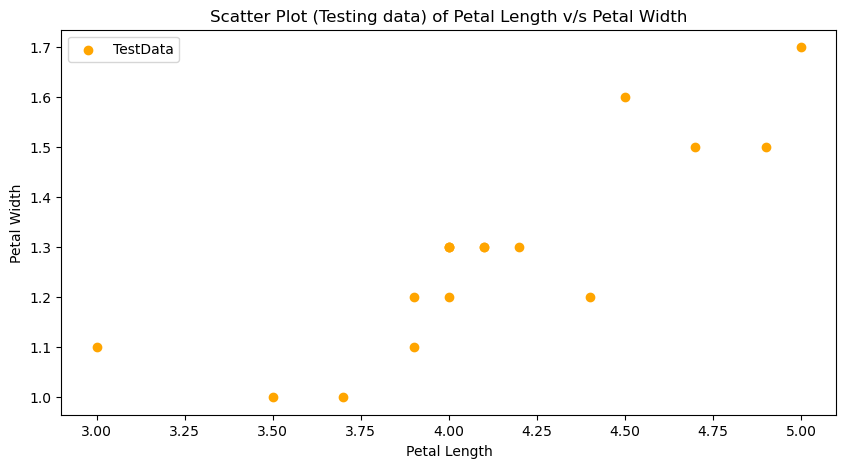

In [39]:
plt.figure(figsize=(10,5))
plt.scatter(X_test, Y_test, color='orange', label='TestData')
plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Scatter Plot (Testing data) of Petal Length v/s Petal Width')

plt.show()

### Now write the `code for LinearRegession` using any preffered method.

#### Linear Regression using `Raw code` (Gradient Descent)

In [40]:
'''
    alpha   -learning rate
      w     -weight
      b     -bias
   features -number of features
      m     -number of such samples
'''

def linear_regression_fit(x, y, alpha=0.005, n_iters=100000):
    m,f = x.shape
    w = np.zeros(f)
    b = 0
    
    #gradient descent
    for _ in range(n_iters):
        y_pred = np.dot(x, w) + b
        
        #compute gradients
        dw = (1/m) * np.dot(x.T, (y_pred-y))
        db = (1/m) * np.sum(y_pred-y)
        
        #update weights and bias
        w = w - alpha * dw
        b = b - alpha * db
    
    return w[0][0], b

def linear_regression_pred(x, w, b):
    y_pred = np.dot(x, w) + b
    return y_pred

In [41]:
#running regressor over traning data
w,b = linear_regression_fit(X_train, Y_train)

y_pred_raw = linear_regression_pred(X_test, w, b)

#### Linear Regression using `Raw code` (Analytical Solution)

In [42]:
def linear_regression(X, y):
    #calculating mean
    mean_x = np.mean(X)
    mean_y = np.mean(y)
    
    n = 0
    d = 0
    for i in range(len(X)):
        n += (X[i] - mean_x) * (y[i] - mean_y)
        d += (X[i] - mean_x) ** 2
        
    #calculating weights and bias
    w = n/d
    b = mean_y-(w * mean_x)
  
    return (b[0], w[0])

In [43]:
B,W = linear_regression(X_train, Y_train)

#### Linear Regression using `SciKit-Learn lib`

In [44]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

Y_pred_sk = regressor.predict(X_test)

### `Intercept(bias)(b)` & `Coefficient(weight)(w)` via different methods

#### `Intercept(b)` & `Coefficient(w)` from Raw code (Gradient Descent)

In [45]:
print(f"Intercept: {b:0.5f}")
print(f"Coefficients: {w:0.5f}")

Intercept: -0.10228
Coefficients: 0.33386


#### `Intercept(b)` & `Coefficient(w)` from Raw code (Analytical Solution)

In [46]:
print(f"Intercept: {B:0.5f}")
print(f"Coefficients: {W:0.5f}")

Intercept: -0.10228
Coefficients: 0.33386


#### `Intercept(b)` & `Coefficient(w)` from Sklearn

In [47]:
print(f"Intercept: {regressor.intercept_[0]:0.5f}")
print(f"Coefficients: {regressor.coef_[0][0]:0.5f}")

Intercept: -0.10228
Coefficients: 0.33386


### Now we can *`overlay the predicted line and test data points`* to see where the predicted point lies.

#### plot of `predicted line` & `test data points` using raw code

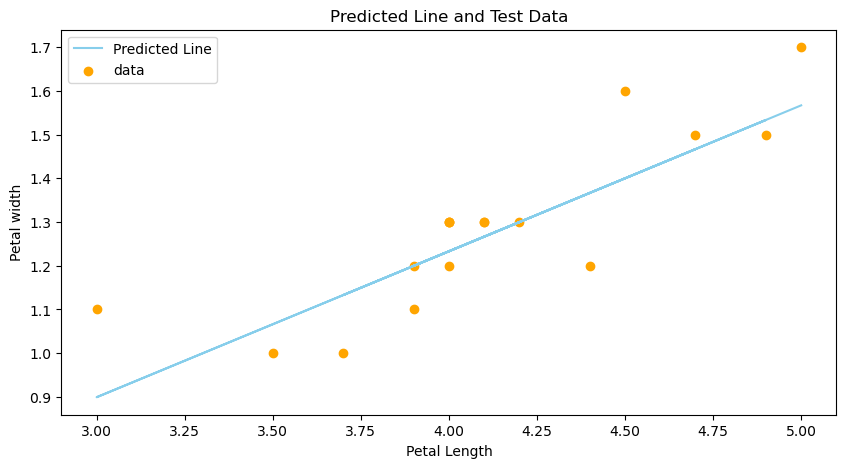

In [48]:
plt.figure(figsize=(10,5))

#pred line
plt.plot(X_test, y_pred_raw, color = "skyblue", label='Predicted Line')

#test data points
plt.scatter(X_test, Y_test, color='orange', label='data')
plt.legend()
plt.xlabel("Petal Length")
plt.ylabel("Petal width")
plt.title('Predicted Line and Test Data')

plt.show()

#### plot of `predicted line` & `test data points` using Sklearn

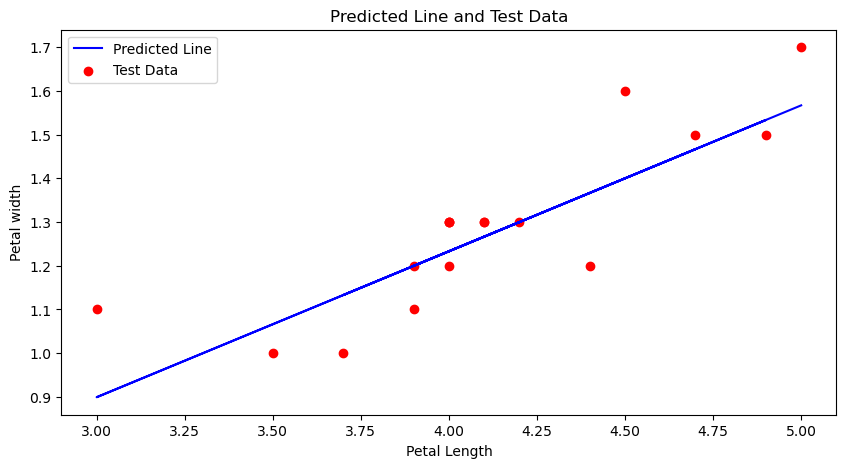

In [49]:
plt.figure(figsize=(10,5))

#pred line
plt.plot(X_test, Y_pred_sk, color='blue', label='Predicted Line')

#test data points
plt.scatter(X_test, Y_test, color='red', label='Test Data')
plt.legend()
plt.xlabel('Petal Length')
plt.ylabel('Petal width')
plt.title('Predicted Line and Test Data')

plt.show()

This is end of assisgnment , but for futhur reading you can search articles on
Lasso Regression, Multivariate Regression , ElasticNet regression, Ridge Regression, Stepwise Regression.